## Imports

In [1]:
from matplotlib.pyplot import figure

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df =pd.read_csv("OnlineNewsPopularity/OnlineNewsPopularity.csv")

In [6]:
pd.set_option("display.max_columns",None)
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,

# I.Data pre-processing

## Check for NA

In [4]:
df[df.isna().any(axis=1)]

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares


## Normalisation of column name

In [7]:
column_headers = list(df.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['url', ' timedelta', ' n_tokens_title', ' n_tokens_content', ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens', ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos', ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle', ' data_channel_is_entertainment', ' data_channel_is_bus', ' data_channel_is_socmed', ' data_channel_is_tech', ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min', ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares', ' self_reference_max_shares', ' self_reference_avg_sharess', ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday', ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday', ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02', ' LDA_03', ' LDA_04', ' global_subjectivity', ' global_sentiment_polarity', ' global_rate_positive_words', ' global_rate_negative_words', ' rat

In [3]:
df.columns = df.columns.str.replace(' ','')

In [9]:
column_headers = list(df.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words', 'rate_negative_words', 'avg_p

## Imputation

#### is_weekend

<BarContainer object of 39644 artists>

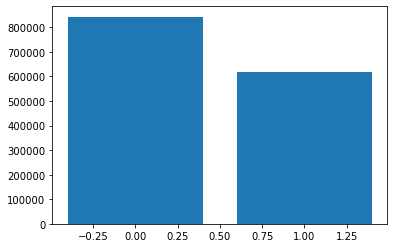

In [8]:
plt.bar(df['weekday_is_saturday'],df['shares'])

<BarContainer object of 39644 artists>

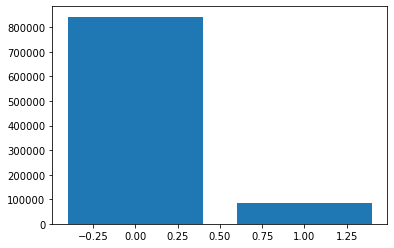

In [9]:
plt.bar(df['weekday_is_sunday'],df['shares'])

##### We can see on these two graphs that the data for Saturday and Sunday are very different, so we choose to delete the weekend column and keep both columns in order to keep a maximum of data.

##### We also noticed a redundancy concerning the triple columns (min, max, avg) we will keep only the avg column which best represents these data.

In [4]:
df.drop(columns = ["kw_min_min","kw_max_min","kw_min_max","kw_max_max","kw_min_avg","kw_max_avg","self_reference_min_shares","self_reference_max_shares","is_weekend","min_positive_polarity","max_positive_polarity","min_negative_polarity","max_negative_polarity"],inplace=True)

In [6]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_avg_min,kw_avg_max,kw_avg_avg,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,avg_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,-0.350000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,-0.118750,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000,0.000000,0.000000,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,-0.466667,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,-0.369697,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000,0.000000,0.000000,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,-0.220192,0.454545,0.136364,0.045455,0.136364,505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,173.125,374962.500000,3031.115764,37033.333333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,-0.260000,0.100000,0.000000,0.400000,0.000000,1800
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,0.0,0.0,1.0,0.0,0.0,184.000,192985.714286,3411.660830,2100.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.029349,0.028575,0.231866,0.681635,0.028575,0.564374,0.194249,0.039634,0.009146,0.812500,0.187500,0.374825,-0.211111,0.300000,1.000000,0.200000,1.000000,1900
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,8.0,0.0,0.0,0.0,0.0,0.0,0.0,168.250,295850.000000,4206.439195,1400.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.159004,0.025025,0.025207,0.643794,0.146970,0.510296,0.024609,0.033937,0.024887,0.576923,0.423077,0.307273,-0.356439,0.454545,0.136364,0.045455,0.136364,1

### Optimization of days'columns

C:\Users\paul_\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


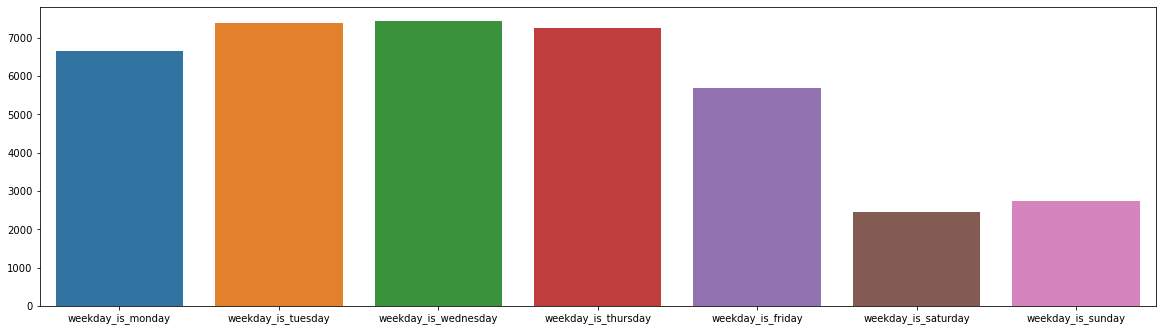

In [6]:
dh = df[['weekday_is_monday','weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday']].sum()
x = dh.index
y = dh[['weekday_is_monday','weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'weekday_is_sunday']]
plt.rcParams["figure.figsize"] = (20,5.5)
sns.barplot(x,y)
plt.show()

#### Let's optimize these days' column by creating a new column with the same amount of data

In [5]:
df['day'] = df['weekday_is_monday']+2*df['weekday_is_tuesday']+3*df['weekday_is_wednesday']+4*df['weekday_is_thursday']+5*df['weekday_is_friday']+6*df['weekday_is_saturday']+7*df['weekday_is_sunday']
df.drop(columns=["weekday_is_monday","weekday_is_tuesday","weekday_is_wednesday","weekday_is_thursday","weekday_is_friday","weekday_is_saturday","weekday_is_sunday"],inplace=True)

In [7]:
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,day
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,496.0,496.0,496.000000,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,1.0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,1.0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,918.0,918.0,918.000000,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1.0
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,1.0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,8.0,0.0,0.0,0.0,0.0,1.0,0.0,-1.0,671.0,173.125,26900.0,843300.0,374962.500000,2514.742857,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.0,0.025038,0.025001,0.151701,0.025000,0.773260,0.482679,0.141964,0.037572,0.014451,0.722222,0.277778,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,3.0
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,7.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,616.0,184.000,6500.0,843300.0,192985.714286,1664.267857,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.0,0.029349,0.028575,0.23

# II. Visualization 

### Plot the correlations

<AxesSubplot:>

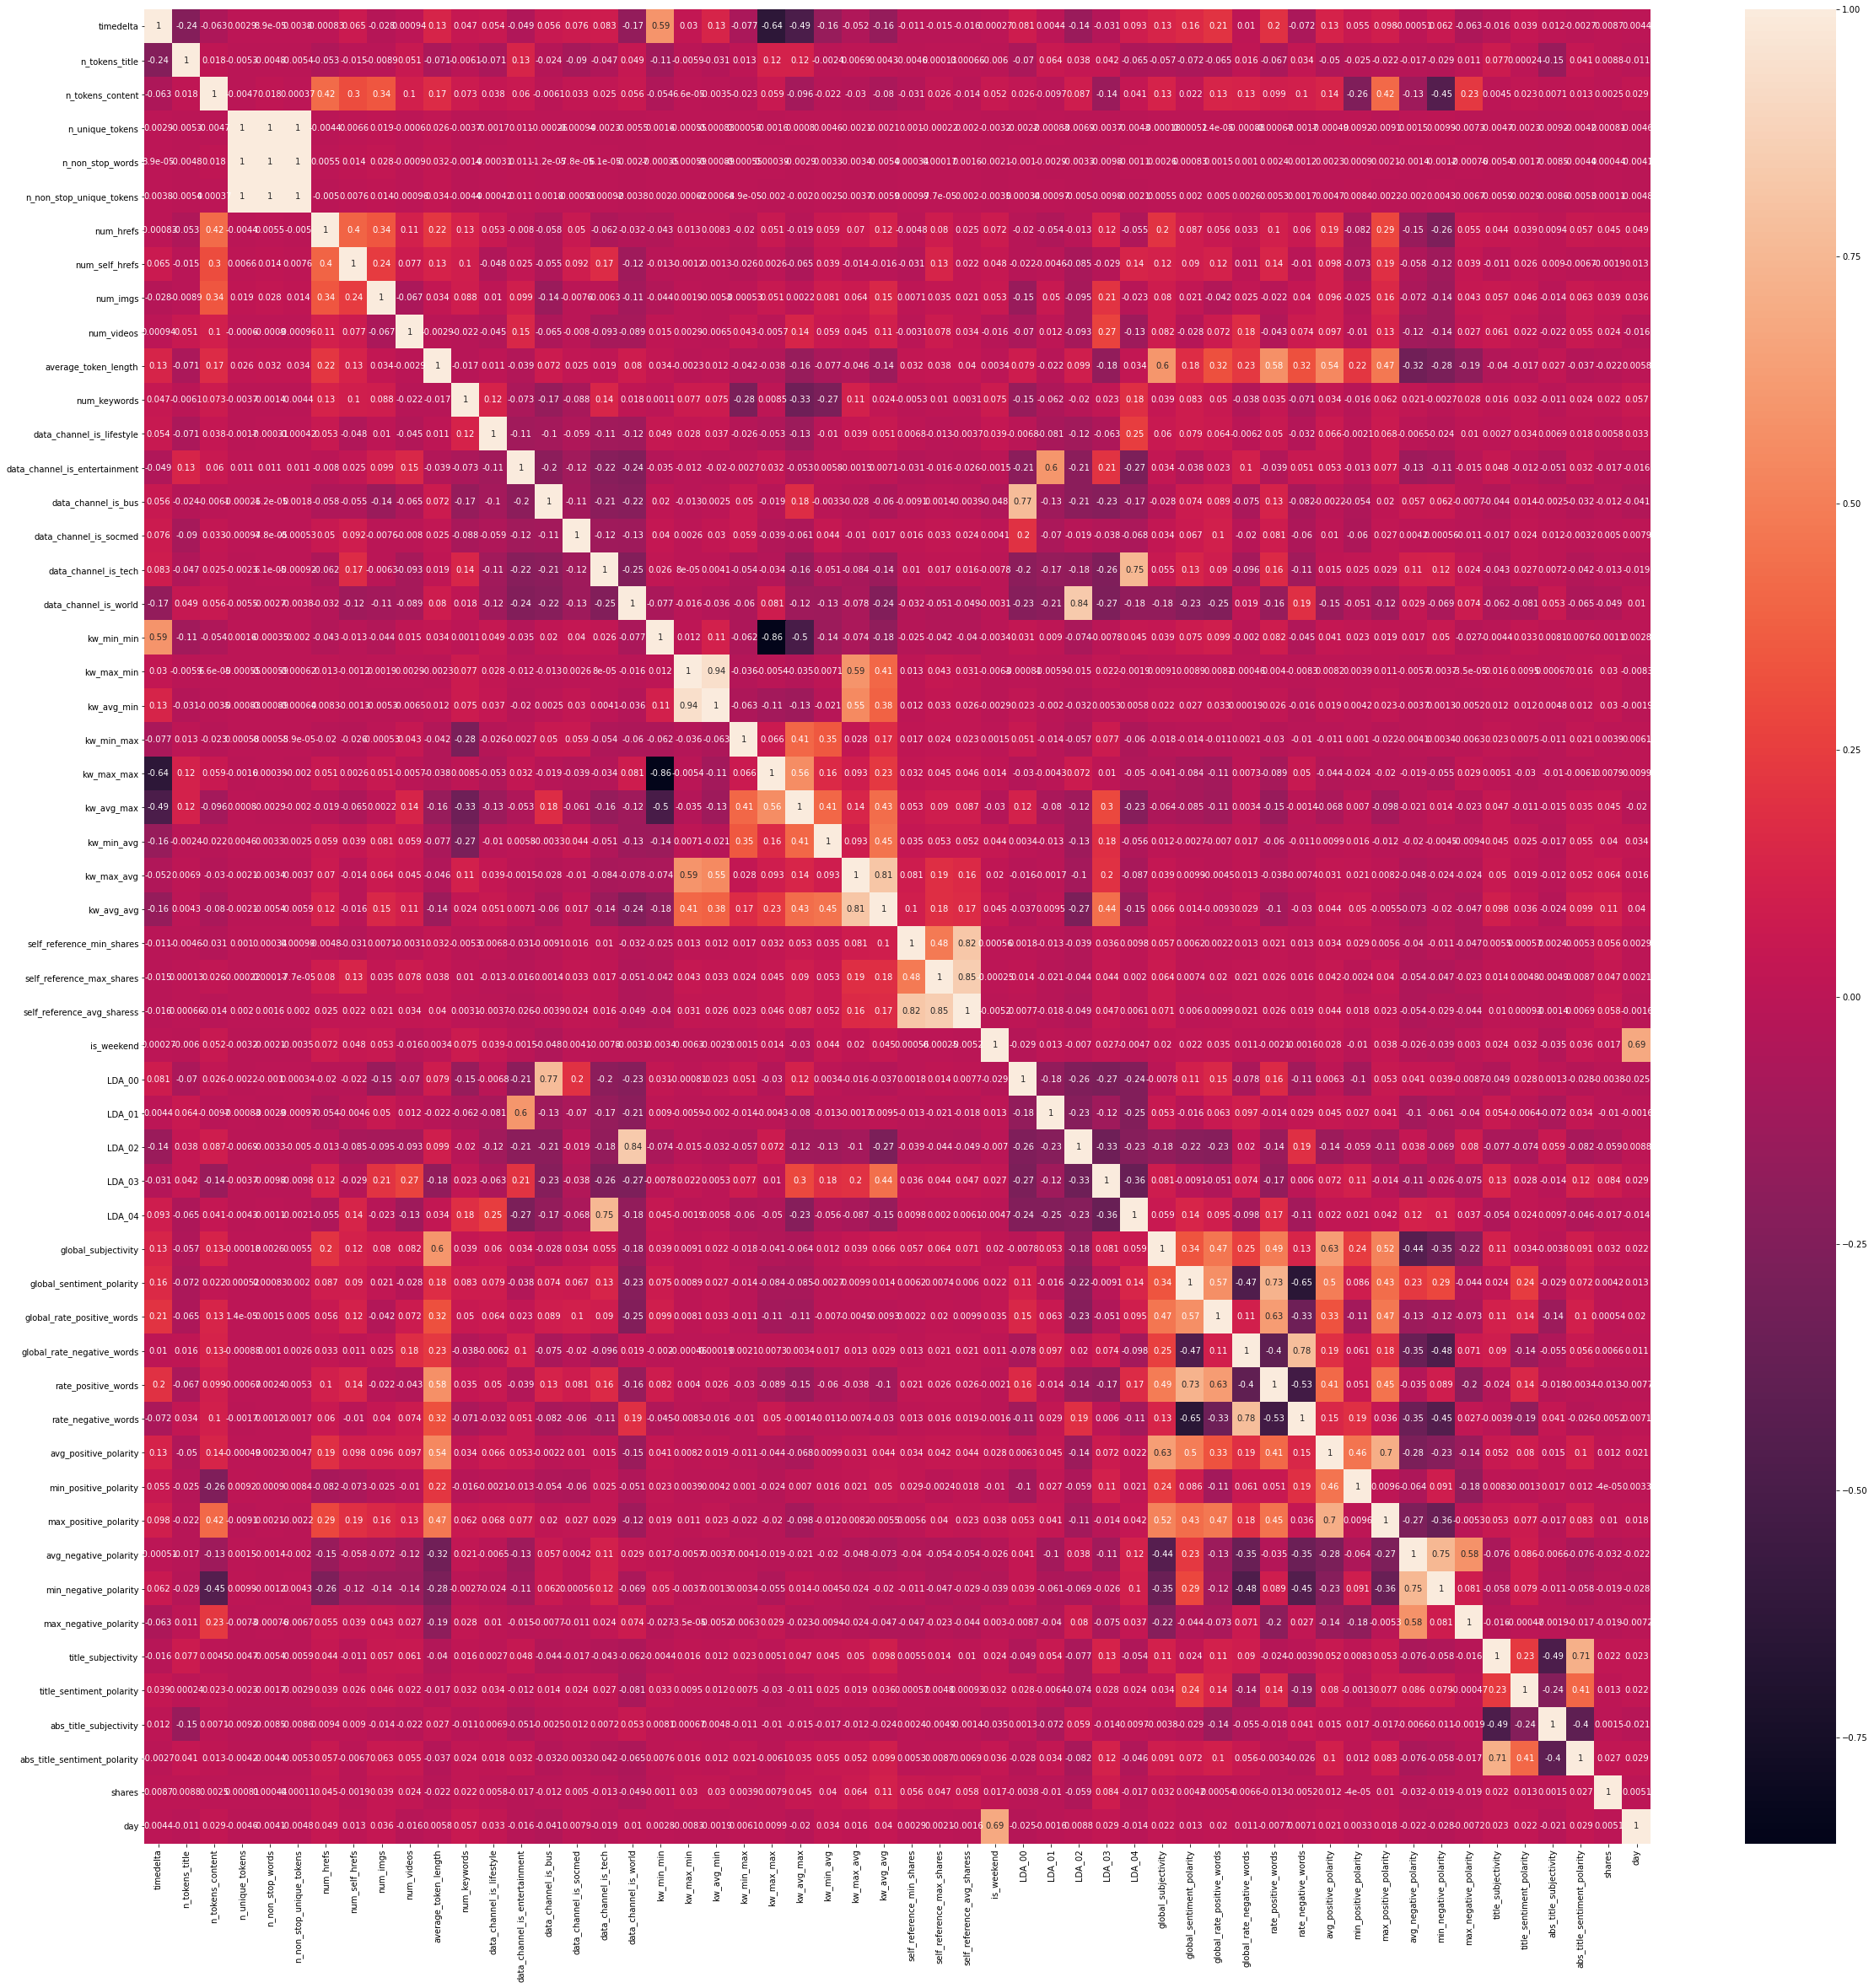

In [8]:
plt.figure(figsize=(40,40))
sns.heatmap(data=df.corr(),annot=True)

#### As we can see from the plot, all features are important for our study

In [19]:
dcorr = df.corr(method='kendall')

In [20]:
dcorr.drop(columns='shares', inplace = True)
line = dcorr.loc['shares']
line

timedelta                        0.021372
n_tokens_title                  -0.028824
n_tokens_content                 0.006825
n_unique_tokens                 -0.030676
n_non_stop_words                 0.006759
n_non_stop_unique_tokens        -0.048015
num_hrefs                        0.062433
num_self_hrefs                   0.026847
num_imgs                         0.062323
num_videos                       0.038009
average_token_length            -0.038598
num_keywords                     0.051229
data_channel_is_lifestyle        0.035020
data_channel_is_entertainment   -0.094401
data_channel_is_bus             -0.015071
data_channel_is_socmed           0.093479
data_channel_is_tech             0.077798
data_channel_is_world           -0.138642
kw_avg_min                       0.062781
kw_avg_max                       0.024872
kw_avg_avg                       0.175039
self_reference_avg_sharess       0.133736
LDA_00                           0.014662
LDA_01                          -0

<AxesSubplot:>

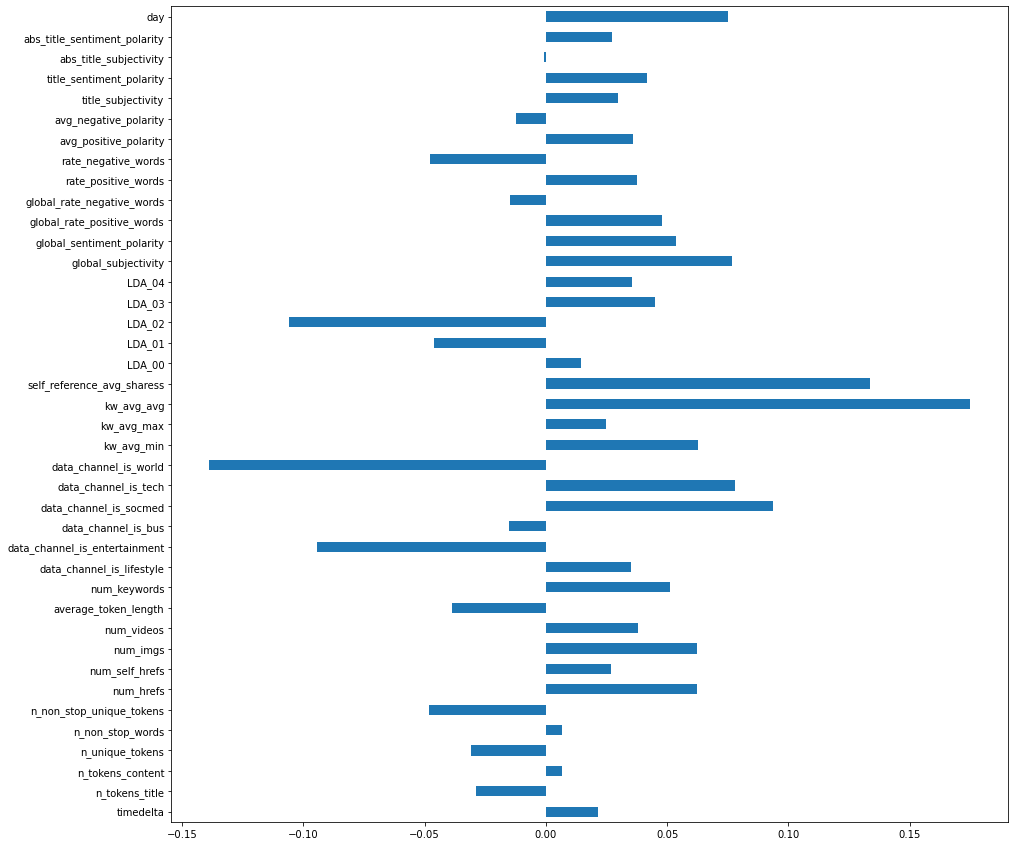

In [18]:
line.plot.barh(figsize=(15,15))

#### From this plot, we can see the most important features are mainly the keywords

### Number of shares for the number of images

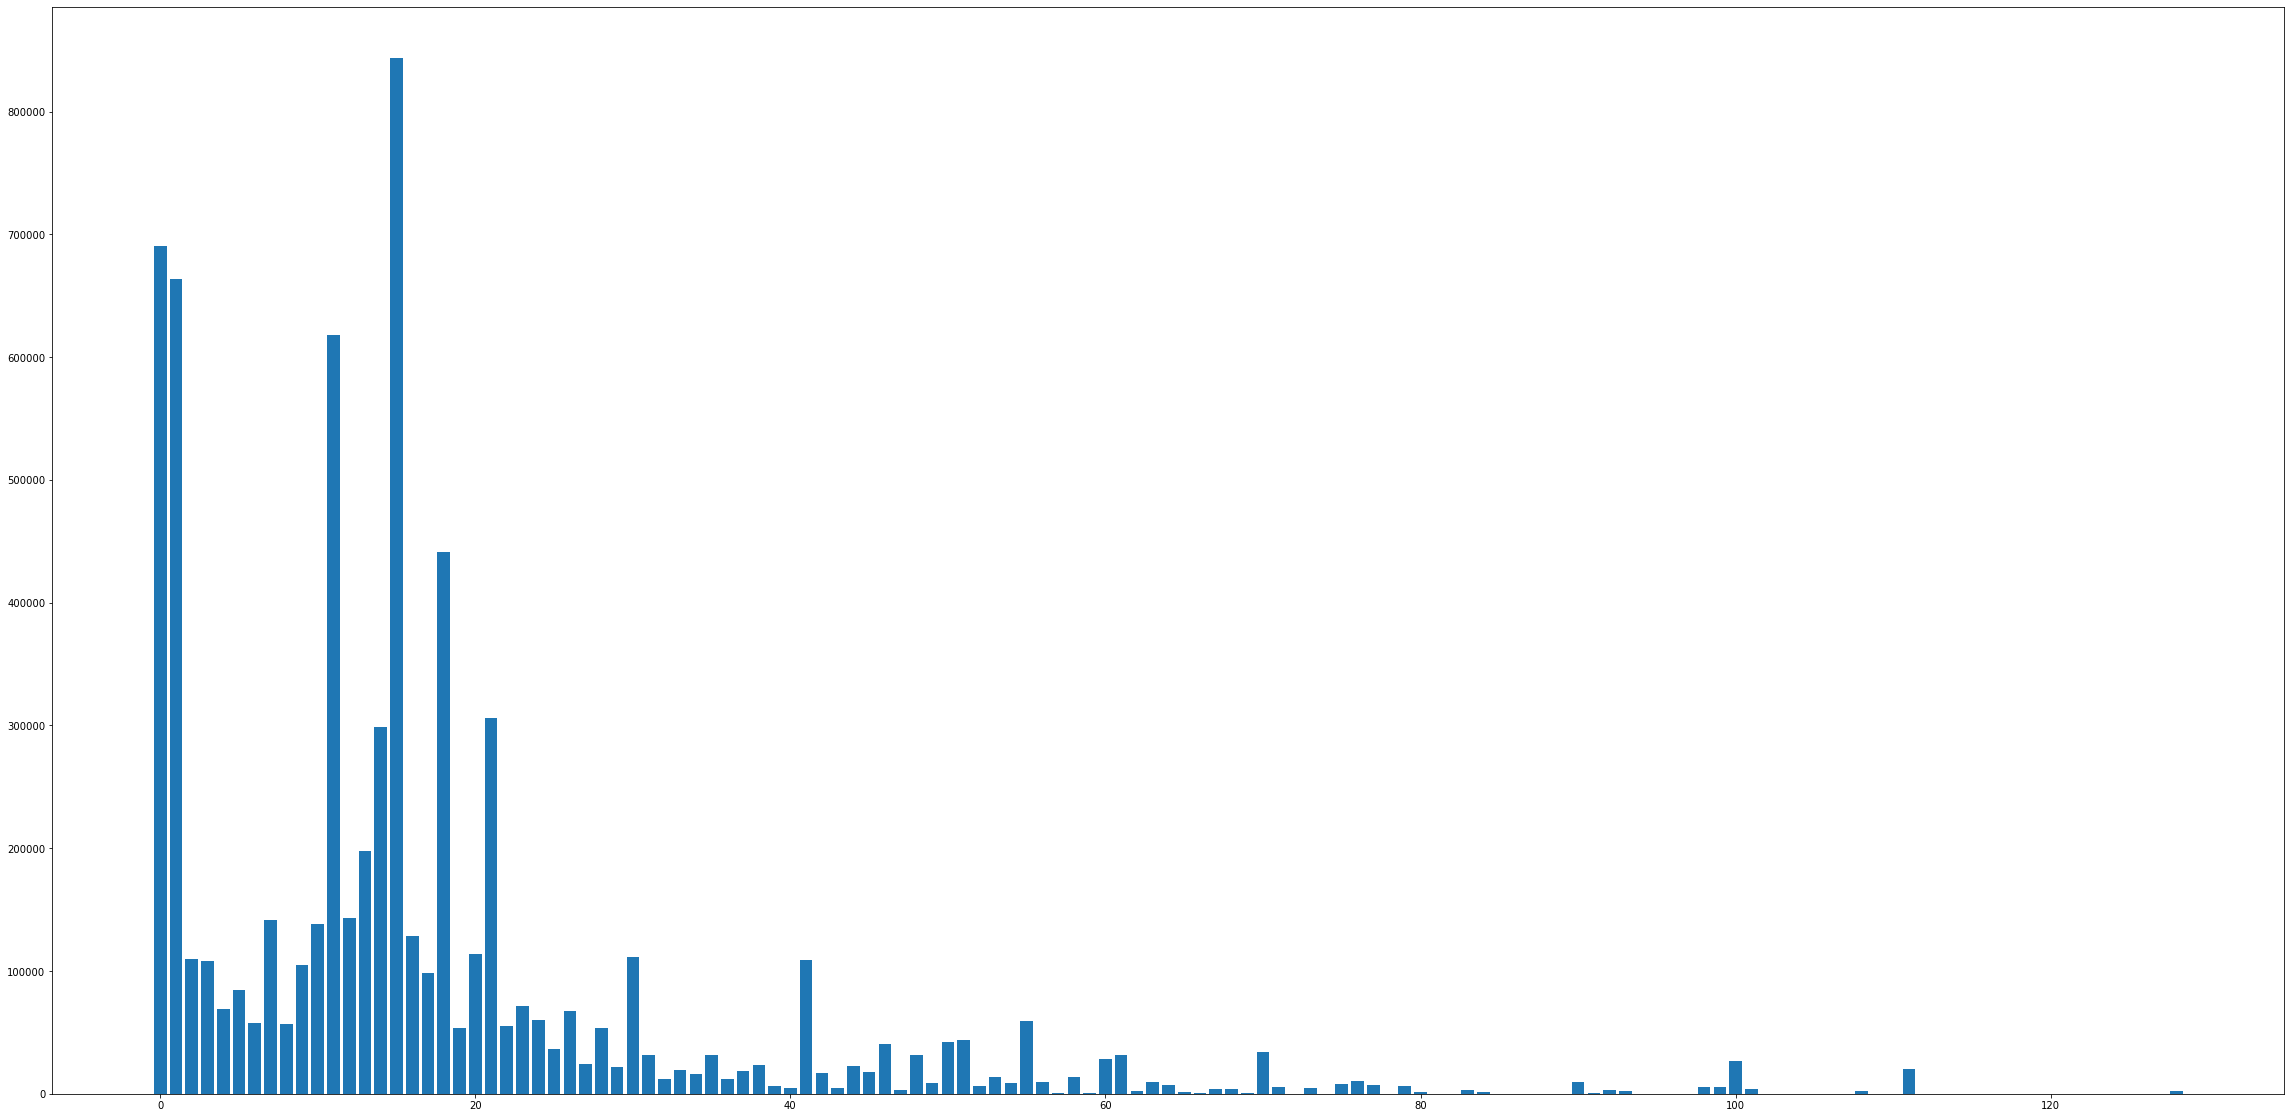

In [19]:
plt.rcParams["figure.figsize"] = (40,20)
plt.bar(df['num_imgs'],df['shares'])
plt.show()

### Number of shares for the number of videos

C:\Users\PCMAC\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


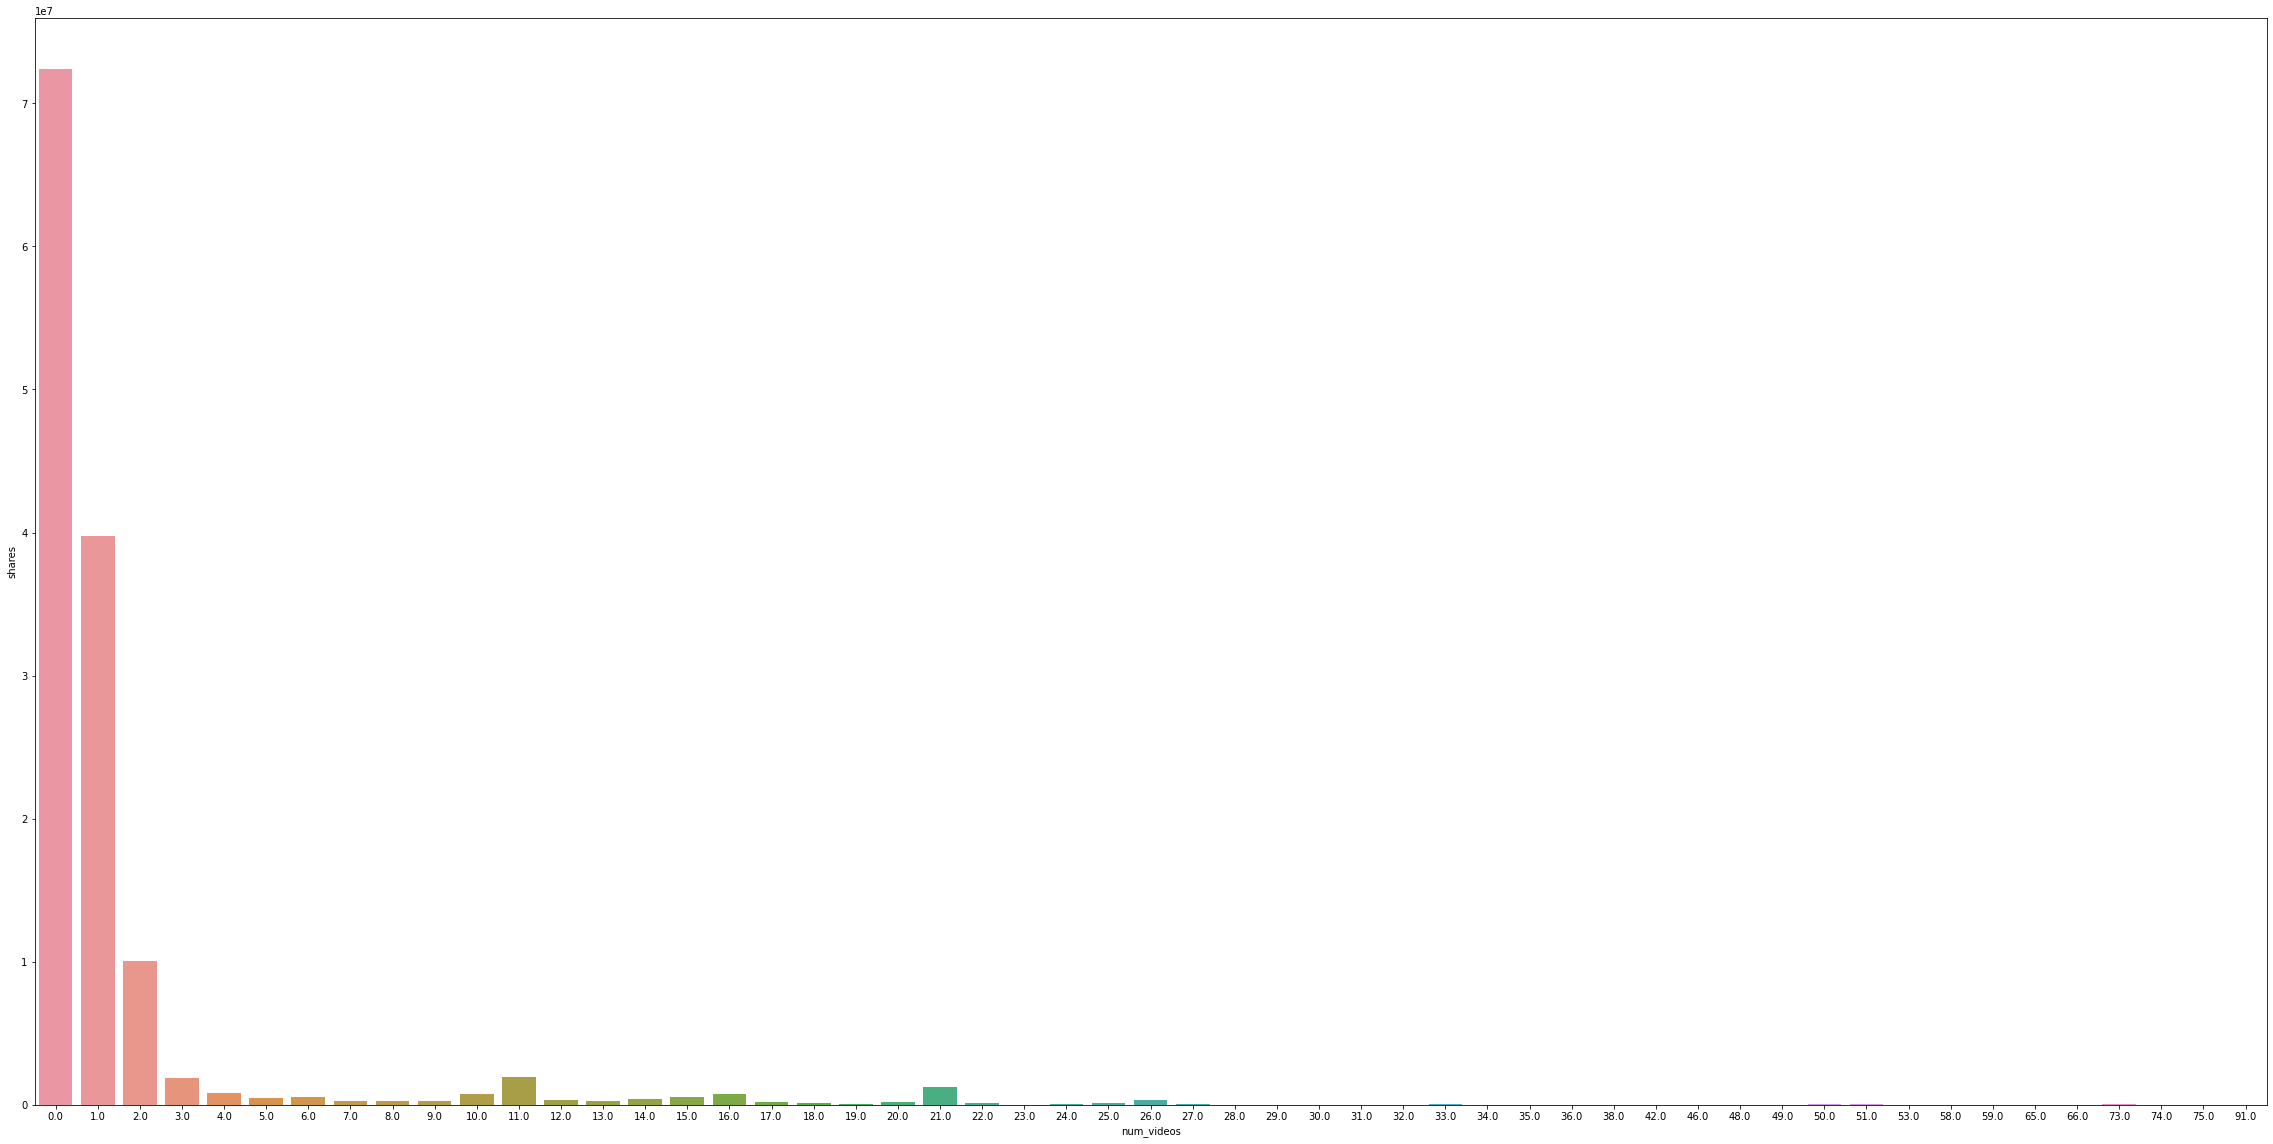

In [20]:
dk = df[['num_videos','shares']]
dk.set_index('num_videos',inplace=True)
dl = dk.groupby('num_videos').sum()
x = dl.index
y = dl['shares']
plt.rcParams["figure.figsize"] = (40,20)
sns.barplot(x,y)
plt.show()

### shares for the time delta using bokeh

In [21]:
    import numpy as np

    from bokeh.plotting import figure, show

    x = df['timedelta']
    y = df['shares']
    radii = 3
    colors = np.array([ [r, g, 150] for r, g in zip(50 + 2*x, 30 + 2*y) ], dtype="uint8")

    TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,help"

    p = figure(tools=TOOLS)

    p.scatter(x, y, radius=radii,
               fill_alpha=0.6,
              line_color=None)

    show(p)

### Distribution of articles according to their number of keywords

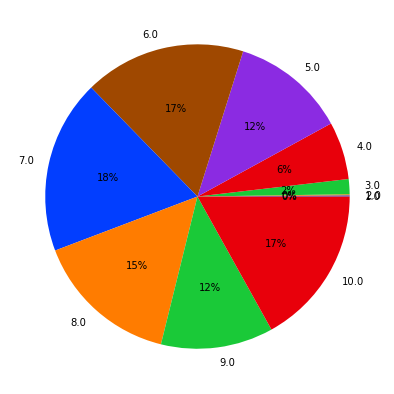

In [19]:
import matplotlib.pyplot as plt

tabgene = df[["num_keywords","url"]].groupby("num_keywords").count()
data = tabgene["url"]
labels = tabgene.index
colors = sns.color_palette('bright')[0:6]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.rcParams["figure.figsize"] = (7,7)
plt.show()

# III.Modeling

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn import tree
from sklearn import metrics 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#### Classification

In [7]:
X = df.drop(['shares','url'],axis=1)
y = df['shares']
sc=StandardScaler()
X=sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

168711874.01750997


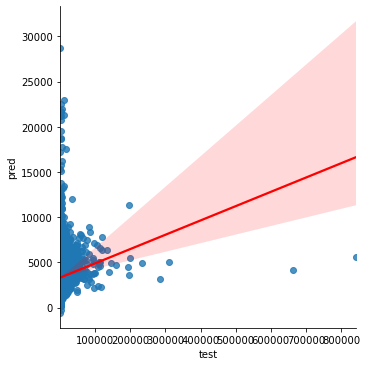

In [8]:
lm = linear_model.LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print(mean_squared_error(y_test, y_pred))
eval_logic = pd.DataFrame()
eval_logic['test'] = y_test
eval_logic['pred'] = y_pred

sns.lmplot(x = 'test', y = 'pred', data = eval_logic, line_kws={'color':'red'})
plt.show()

#### Decision Tree

316264834.3105557


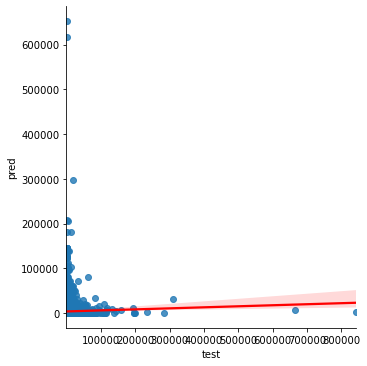

In [9]:
dt = tree.DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print(mean_squared_error(y_test, y_pred))
eval_logic = pd.DataFrame()
eval_logic['test'] = y_test
eval_logic['pred'] = y_pred

sns.lmplot(x = 'test', y = 'pred', data = eval_logic, line_kws={'color':'red'})
plt.show()

#### Logic Regression

110492485.29553321


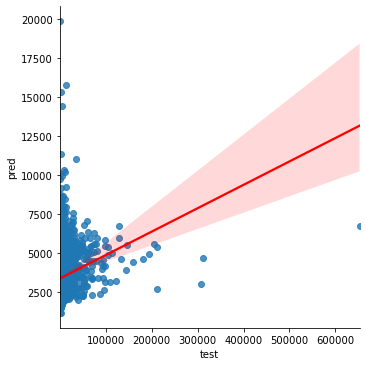

In [17]:
from sklearn.linear_model import TweedieRegressor
lr = TweedieRegressor()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(mean_squared_error(y_test, y_pred))
eval_logic = pd.DataFrame()
eval_logic['test'] = y_test
eval_logic['pred'] = y_pred

sns.lmplot(x = 'test', y = 'pred', data = eval_logic, line_kws={'color':'red'})
plt.show()

#### SVM

116231013.14354613


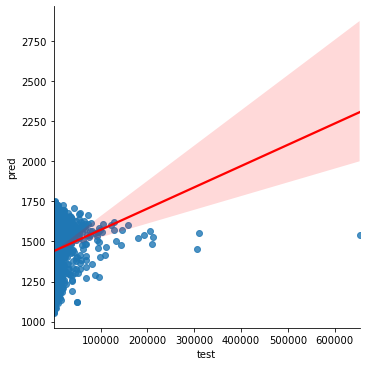

In [18]:
from sklearn import svm
regr = svm.SVR()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(mean_squared_error(y_test, y_pred))
eval_logic = pd.DataFrame()
eval_logic['test'] = y_test
eval_logic['pred'] = y_pred
eval_logic.sort_values(by = 'test',inplace = True)

sns.lmplot(x = 'test', y = 'pred', data = eval_logic, line_kws={'color':'red'})
plt.show()

#### Neural Network

C:\Users\paul_\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:709: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


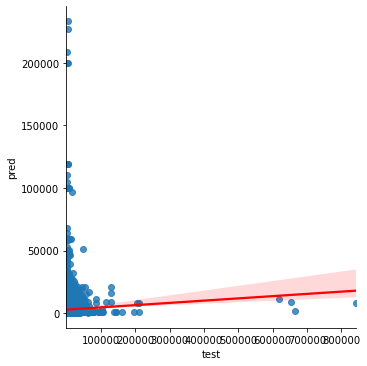

In [24]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
np.mean(y_test== y_pred)
eval_logic = pd.DataFrame()
eval_logic['test'] = y_test
eval_logic['pred'] = y_pred
eval_logic.sort_values(by = 'test',inplace = True)

sns.lmplot(x = 'test', y = 'pred', data = eval_logic, line_kws={'color':'red'})
plt.show()

#### Unfortunately, the classification models are not at all optimised for our database. We have a lot of outliers which disrupt our models.
#### We decided to transform the 'shares' column into a binary one, by giving the number '1' if the article is above mean shares and the number '0' if it below

### Spliting and fiting the dataset

In [10]:
x = df.drop(['shares','url'],axis=1)
y = df['shares'].apply(lambda x: 0 if x <df['shares'].mean()  else 1)

In [11]:
sc=StandardScaler()
x=sc.fit_transform(x)
x,y = SMOTE().fit_resample(x, y)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

#### Logistic Regression

In [13]:
LR = LogisticRegression(multi_class='auto')
LR.fit(x_train,y_train)
pred = LR.predict(x_test)
print("Accu", accuracy_score(y_test,pred))
print("MSE", metrics.mean_squared_error(y_test, pred))

Accu 0.640570249123986
MSE 0.35942975087601403


C:\Users\paul_\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Decision Tree

In [31]:
dtree = tree.DecisionTreeRegressor()
dtree.fit(x_train, y_train)
pred = dtree.predict(x_test)
print("Accu", accuracy_score(y_test,pred))
print("MSE", metrics.mean_squared_error(y_test, pred))

Accu 0.7713723419574713
MSE 0.2286276580425287


### Random Forest

In [32]:
randf = RandomForestClassifier(n_estimators=100, max_features="sqrt", random_state=40)
randf.fit(x_train, y_train)
pred = randf.predict(x_test)
print("Accu", accuracy_score(y_test,pred))
print("MSE", metrics.mean_squared_error(y_test, pred))

Accu 0.8790380646090338
MSE 0.12096193539096625


#### SVM

In [34]:
clf = svm.SVC()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
mean_squared_error(y_test, y_pred)

0.2874285988575817

#### Those regression models are far better than the classification ones. Indeed, we have correct accuracies and MSE.